In [2]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

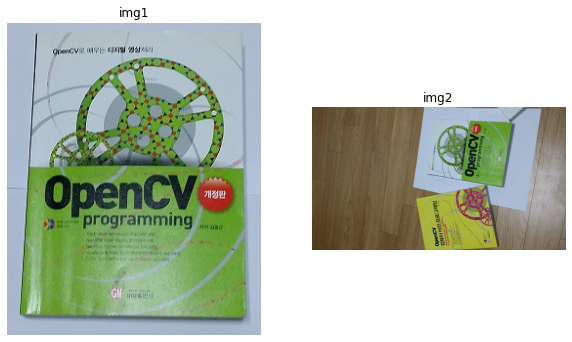

In [8]:
filename1 = './data/book1.jpg'
filename2 = './data/book2.jpg'
# filename1 = './data/cup1.jpg'
# filename2 = './data/cup2.jpg'

src1_bgr = cv2.imread(filename1)
src2_bgr = cv2.imread(filename2)
img1= cv2.cvtColor(src1_bgr,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2_bgr,cv2.COLOR_BGR2GRAY)
src1_rgb = cv2.cvtColor(src1_bgr,cv2.COLOR_BGR2RGB)
src2_rgb = cv2.cvtColor(src2_bgr,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,30))
imgae=plt.subplot(1,2,1)
imgae.set_title('img1')
plt.axis('off')
plt.imshow(src1_rgb)
imgae=plt.subplot(1,2,2)
imgae.set_title('img2')
plt.axis('off')
plt.imshow(src2_rgb)

len(matches)= 526
matches[0]=(queryIdx:759, trainIdx:1625, distance:17.0)
matches[1]=(queryIdx:473, trainIdx:1333, distance:24.0)
matches[2]=(queryIdx:220, trainIdx:95, distance:27.0)
matches[3]=(queryIdx:735, trainIdx:100, distance:30.0)
matches[4]=(queryIdx:342, trainIdx:486, distance:31.0)
matches[5]=(queryIdx:343, trainIdx:437, distance:32.0)
matches[6]=(queryIdx:928, trainIdx:1371, distance:32.0)
matches[7]=(queryIdx:392, trainIdx:358, distance:33.0)
matches[8]=(queryIdx:283, trainIdx:527, distance:34.0)
matches[9]=(queryIdx:830, trainIdx:1410, distance:34.0)


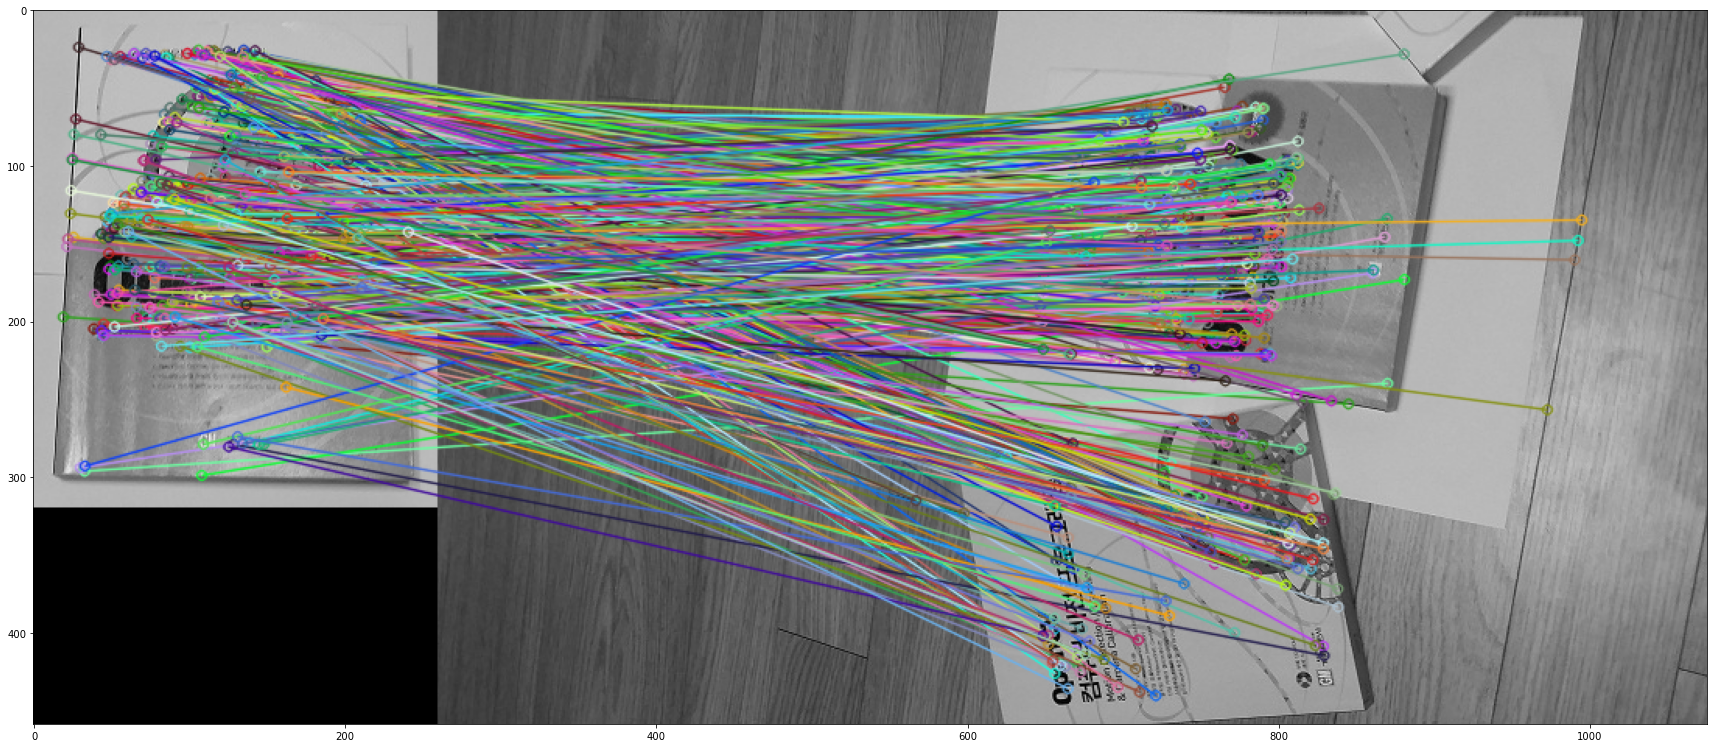

In [9]:
# descriptor
orb = cv2.ORB_create(nfeatures=1000)
brisk = cv2.BRISK_create()
detector = [orb, brisk]

didx = 1
kp1, des1 = detector[didx].detectAndCompute(img1, None)
kp2, des2 = detector[didx].detectAndCompute(img2, None)

# matcher
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
flann = cv2.FlannBasedMatcher_create()
matcher = [bf, flann]

midx = 0
try:
    matches = matcher[midx].match(des1,des2)
except:
    matches = matcher[midx].match(np.float32(des1),np.float32(des2))

# result display
matches = sorted(matches, key = lambda x:x.distance)
print('len(matches)=',len(matches)) 
for i,m in enumerate(matches[:10]):
    print('matches[{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(i,m.queryIdx,m.trainIdx,m.distance))
    
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
plt.figure(figsize=(30,60))
plt.imshow(img3)
plt.show()

len(good_matches)= 10


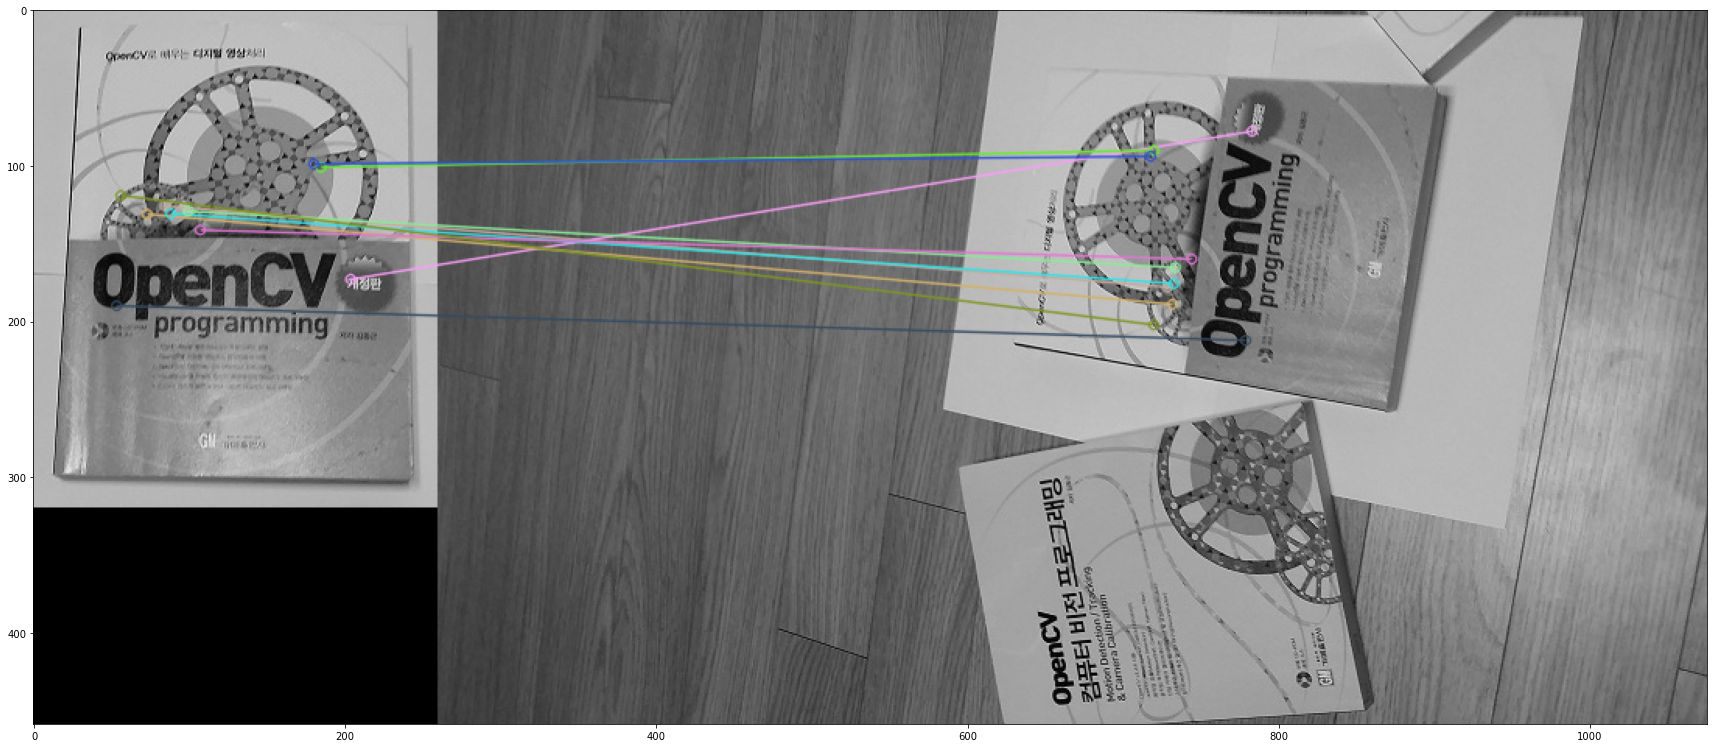

In [10]:
MIN_MATCH_COUNT = 10

# draw only good matching
minDist = matches[0].distance
good_matches = list(filter(lambda m:m.distance<=2*minDist, matches))
print('len(good_matches)=',len(good_matches))    
if len(good_matches) < MIN_MATCH_COUNT:
    print('sorry,too small good matches')
    #exit()
    
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(30,60))
plt.imshow(img4)
plt.show()

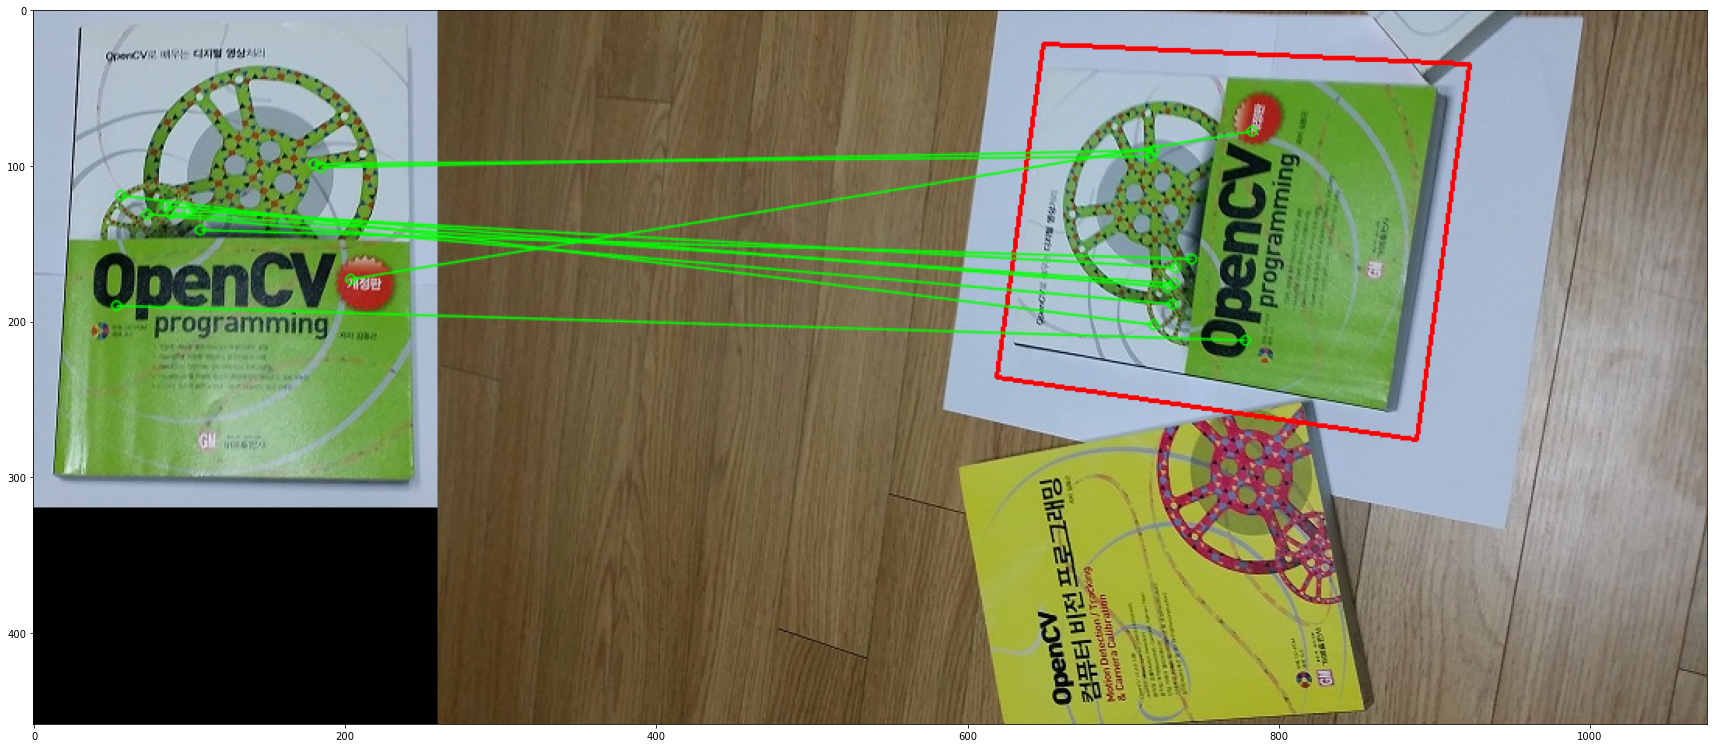

In [11]:
src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])

H,mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)
mask_matches = mask.flatten().tolist()

h,w = img1.shape
pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2) # (4, 1, 2)
pts2 = cv2.perspectiveTransform(pts, H)
src2_rgb = cv2.polylines(src2_rgb,[np.int32(pts2)], True,(255,0,0), 2)

draw_params = dict(matchColor=(0,255,0), singlePointColor=None, matchesMask = mask_matches, flags=2)
img5 = cv2.drawMatches(src1_rgb, kp1, src2_rgb, kp2, good_matches, None, **draw_params)
plt.figure(figsize=(30,60))
plt.imshow(img5)
plt.show()